In [1]:
#Loading the required python packages 
import os
import sys
import argparse
import csv
import re
from io import StringIO
import pandas as pd

In [2]:
#here am defining the regex pattern to help me identify the ip address
##indentifier and other important data from an access log line

parts = [
    r'"(?P<host>\S+)',                   # host %h
    r'(?P<indent>\S+)',                             # indent %l (unused)
    r'(?P<user>\S+)',                   # user %u
    r'\[(?P<time>.+)\]',                # time %t
    r'"(?P<method>\w+)',                #action
    r'(?P<request_path>.+)"',               # request "%r"
    r'(?P<status>[0-9]+)',              # status %>s
    r'(?P<size>\S+)',                   # size %b (careful, can be '-')
    r'"(?P<referer>.*)"',               # referer "%{Referer}i"
    r'"(?P<agent>.*)"',                 # user agent "%{User-agent}i"
]
pattern = re.compile(r'\s+'.join(parts)+r'\s*\Z')#storing  the pattern in the a pattern varriable using re python module

In [3]:
# LOG_REGEX = '(?P<ip>[(\d\.)]+) (?P<indent>\S+) (?P<user>\S+) \[(?P<date>.*?) -(.*?)\] "(?P<method>\w+) (?P<request_path>.*?) HTTP/(?P<http_version>.*?)" (?P<status_code>\d+) (?P<response_size>\d+) "(?P<referrer>.*?)" "(?P<user_agent>.*?)"'

In [4]:
# compiled = re.compile(LOG_REGEX)

In [5]:

f = open("data/acunetix.txt","r")#loading the data file using open function in python
contents = f.readlines()#assign/storing  the lines read from the access log file in the contents varriable 
data = [] #here am defining a list to store the attributes got from log line
for line in contents:
    m = pattern.match(line)#here i match the line regex 
    res = m.groupdict()#group the results from the matching into a dictionary
    data.append(res)#and finally append the results into a dictionary 

In [6]:
data

[{'host': '192.168.4.25',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:16:30:52 +0300',
  'method': 'POST',
  'request_path': '/administrator/index.php HTTP/1.1',
  'status': '303',
  'size': '382',
  'referer': 'http://192.168.4.161/DVWA',
  'agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.21 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.21"'},
 {'host': '192.168.4.25',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:16:29:05 +0300',
  'method': 'POST',
  'request_path': '/index.php/component/search/ HTTP/1.1',
  'status': '500',
  'size': '2011',
  'referer': '-',
  'agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.21 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.21"'},
 {'host': '192.168.4.25',
  'indent': '-',
  'user': '-',
  'time': '22/Dec/2016:16:28:53 +0300',
  'method': 'POST',
  'request_path': '/index.php/component/search/ HTTP/1.1',
  'status': '303',
  'size': '374',
  'referer': 'http://192.168.4.161/DVWA',
  'agent': 'Mo

In [7]:
##create a csv file to store created data as a csv file
csv_columns = ['host','indent','user','time','method','request_path','status','size','referer','agent']
csv_file = "acunetix.csv"#define the file to be created
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for df in data:
            writer.writerow(df)
except IOError:
    print("I/O error")

In [8]:
df = pd.read_csv("data/acunetix.csv")##load the csv file created using pandas python module 

In [9]:
df

,host,indent,user,time,method,request_path,status,size,referer,agent
0,192.168.4.25,-,-,22/Dec/2016:16:30:52 +0300,POST,/administrator/index.php HTTP/1.1,303,382,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,192.168.4.25,-,-,22/Dec/2016:16:29:05 +0300,POST,/index.php/component/search/ HTTP/1.1,500,2011,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
2,192.168.4.25,-,-,22/Dec/2016:16:28:53 +0300,POST,/index.php/component/search/ HTTP/1.1,303,374,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
3,192.168.4.25,-,-,22/Dec/2016:16:32:50 +0300,POST,/index.php/component/search/ HTTP/1.1,200,3054,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
4,192.168.4.25,-,-,22/Dec/2016:16:29:13 +0300,POST,/index.php/component/search/ HTTP/1.1,200,3056,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
...,...,...,...,...,...,...,...,...,...,...
6534,192.168.4.25,-,-,22/Dec/2016:16:22:11 +0300,POST,/index.php/component/search/ HTTP/1.1,303,376,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6535,192.168.4.25,-,-,22/Dec/2016:16:33:44 +0300,POST,/index.php/component/search/ HTTP/1.1,303,417,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6536,192.168.4.25,-,-,22/Dec/2016:16:23:07 +0300,POST,/index.php/component/search/ HTTP/1.1,303,393,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6537,192.168.4.25,-,-,22/Dec/2016:16:32:54 +0300,POST,/index.php/component/search/ HTTP/1.1,200,3054,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [10]:
df_host_unique = df.groupby('host').count()

In [11]:
df_host_unique

,indent,user,time,method,request_path,status,size,referer,agent
host,,,,,,,,,
192.168.4.25,6539,6539,6539,6539,6539,6539,6539,6539,6539


In [12]:
df_method_unique =df.groupby('method').count()

In [13]:
df_method_unique

,host,indent,user,time,request_path,status,size,referer,agent
method,,,,,,,,,
GET,1040,1040,1040,1040,1040,1040,1040,1040,1040
POST,5499,5499,5499,5499,5499,5499,5499,5499,5499


In [14]:
df_status_unique = df.groupby('status').count()

In [15]:
df_status_unique

,host,indent,user,time,method,request_path,size,referer,agent
status,,,,,,,,,
200,2036,2036,2036,2036,2036,2036,2036,2036,2036
301,18,18,18,18,18,18,18,18,18
302,99,99,99,99,99,99,99,99,99
303,3407,3407,3407,3407,3407,3407,3407,3407,3407
400,12,12,12,12,12,12,12,12,12
403,3,3,3,3,3,3,3,3,3
404,258,258,258,258,258,258,258,258,258
500,706,706,706,706,706,706,706,706,706


In [16]:
size_summary = df['size'].describe()

In [301]:
size_summary

count     6539.000000
mean      1274.866493
std       1882.247923
min        223.000000
25%        373.000000
50%        399.000000
75%       2045.000000
max      68451.000000
Name: size, dtype: float64

In [302]:
# from pyspark.sql import SparkSession

# spark = SparkSession \
#     .builder \
#     .appName("Python Spark SQL basic example") \
#     .config("spark.some.config.option", "some-value") \
#     .getOrCreate()

# df_spark = spark.read.csv("data/acunetix.csv",header=True,sep="|");

In [303]:
# df_spark.toPandas()

In [304]:
from pyspark.sql import functions as F

In [308]:
# (df.agg(F.min(df['size']).alias('min_content_size'),
#              F.max(df['size']).alias('max_content_size'),
#              F.mean(df['size']).alias('mean_content_size'),
#              F.stddev(df['size']).alias('std_content_size'),
#              F.count(df['size']).alias('count_content_size')).toPandas())

In [309]:
status_freq_df=(df
              .groupby('status')
               
              .count())
print("Total distinct HTTP Status codes:",status_freq_df.count())

Total distinct HTTP Status codes: host            8
indent          8
user            8
time            8
method          8
request_path    8
size            8
referer         8
agent           8
dtype: int64


In [310]:
status_freq_df= df.groupby(["status", "host"])['agent'].count().reset_index(name="count")

In [311]:
status_freq_pd_df = (status_freq_df
                         .sort_values(by=['host'],
                                      ascending=False))

In [312]:
# df = df.sort_values(by=['status','count'])
status_freq_pd_df

,status,host,count
0,200,192.168.4.25,2036
1,301,192.168.4.25,18
2,302,192.168.4.25,99
3,303,192.168.4.25,3407
4,400,192.168.4.25,12
5,403,192.168.4.25,3
6,404,192.168.4.25,258
7,500,192.168.4.25,706


In [313]:
status_freq_pd_df = status_freq_pd_df.drop(['host'],axis=1)

In [314]:
status_freq_pd_df

,status,count
0,200,2036
1,301,18
2,302,99
3,303,3407
4,400,12
5,403,3
6,404,258
7,500,706


In [315]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplot inline 

UsageError: Line magic function `%matplot` not found.


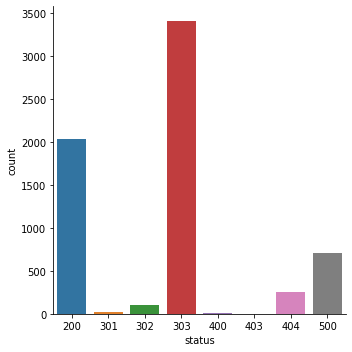

In [316]:
sns.catplot(x='status',y='count',data=status_freq_pd_df,kind='bar',order=status_freq_pd_df['status'])

In [317]:
import pyspark
from pyspark.sql import SparkSession

In [322]:
# spark = SparkSession.builder.appName('pandasToSparkDF').getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
df_spark = spark.createDataFrame(status_freq_pd_df)

In [323]:
df_spark

DataFrame[status: bigint, count: bigint]

In [325]:
# log_freq_df = df_spark.withColumn('log(count)',
#                                         F.log(df_spark['count']))
# log_freq_df.show()

In [326]:
# log_freq_pd_df = (log_freq_df
#                     .toPandas()
#                     .sort_values(by=['log(count)'],
#                                  ascending=False))
# sns.catplot(x='status', y='log(count)', data=log_freq_pd_df,
#             kind='bar', order=status_freq_pd_df['status'])

In [327]:
host_sum_df =(df
               .groupby('host')
               .count())

host_sum_df

,indent,user,time,method,request_path,status,size,referer,agent
host,,,,,,,,,
192.168.4.25,6539,6539,6539,6539,6539,6539,6539,6539,6539


In [328]:
# host_sum_pd_df = host_sum_df
# host_sum_pd_df.iloc[8]['host']

In [329]:
paths_df = (df
            .groupby('request_path')['status']
            .count().reset_index(name="count"))

paths_df

,request_path,count
0,/ HTTP/1.1,7
1,/!(()%26%26!%7c*%7c*%7c/component/content/cate...,1
2,/$sitepreview/localhost:2006/Wizard/ HTTP/1.1,1
3,/%24(nslookup%20wM4jKgxD)/component/content/ar...,2
4,/%24{%40print(md5(acunetix_wvs_security_test))...,1
...,...,...
933,/tmp HTTP/1.1,1
934,/wstat/ HTTP/1.1,1
935,HTTP/1.1,1
936,http://192.168.4.161/index.php HTTP/1.1,1


In [330]:
not200_df = df.loc[df['status'] !=200]


In [331]:
not200_df

,host,indent,user,time,method,request_path,status,size,referer,agent
0,192.168.4.25,-,-,22/Dec/2016:16:30:52 +0300,POST,/administrator/index.php HTTP/1.1,303,382,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,192.168.4.25,-,-,22/Dec/2016:16:29:05 +0300,POST,/index.php/component/search/ HTTP/1.1,500,2011,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
2,192.168.4.25,-,-,22/Dec/2016:16:28:53 +0300,POST,/index.php/component/search/ HTTP/1.1,303,374,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6,192.168.4.25,-,-,22/Dec/2016:16:24:39 +0300,POST,/index.php/component/search/ HTTP/1.1,303,412,-,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
7,192.168.4.25,-,-,22/Dec/2016:16:28:52 +0300,POST,/index.php/component/search/ HTTP/1.1,303,377,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
...,...,...,...,...,...,...,...,...,...,...
6532,192.168.4.25,-,-,22/Dec/2016:16:21:10 +0300,POST,/index.php/component/search/ HTTP/1.1,303,350,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6534,192.168.4.25,-,-,22/Dec/2016:16:22:11 +0300,POST,/index.php/component/search/ HTTP/1.1,303,376,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6535,192.168.4.25,-,-,22/Dec/2016:16:33:44 +0300,POST,/index.php/component/search/ HTTP/1.1,303,417,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6536,192.168.4.25,-,-,22/Dec/2016:16:23:07 +0300,POST,/index.php/component/search/ HTTP/1.1,303,393,http://192.168.4.161/DVWA,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [332]:
error_endpoints_freq_df = (not200_df
                               .groupby('request_path')['status']
                               .count().reset_index(name="count"))
                              
                        

In [333]:
error_endpoints_freq_df.sample(20)

,request_path,count
220,"/index.php/component/content/?format=1'\""&type...",1
336,/index.php/component/users/?view=8OWgL7fS';%20...,1
356,/index.php/http://hitjj0oOIuFSr.bxss.me//searc...,1
106,/admin/mysql/main.php HTTP/1.1,2
2,/$sitepreview/localhost:2006/Wizard/ HTTP/1.1,1
24,//WEB-INF/jboss-web.xml HTTP/1.1,1
142,/index.php HTTP/1.1,278
308,/index.php/component/file:///etc/passwd/catego...,1
272,/index.php/component/content/?format=http://te...,1
136,/http://testasp.vulnweb.com/t/fit.txt%3F.php/c...,1


In [334]:
# unique_host_count = (df['host']
#                      .unique()
#                      .count())
# unique_host_count